In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [5]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [6]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data=raw_data.drop(['Model'],axis=1)

In [9]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [11]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
data_no_mv=data.dropna(axis=0)

In [13]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


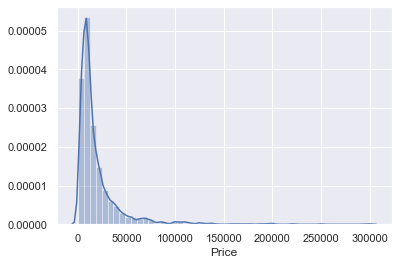

In [14]:
sns.distplot(data_no_mv['Price'])

In [15]:
q=data_no_mv['Price'].quantile(.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


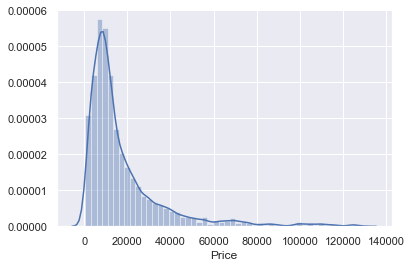

In [16]:
sns.distplot(data_1['Price'])

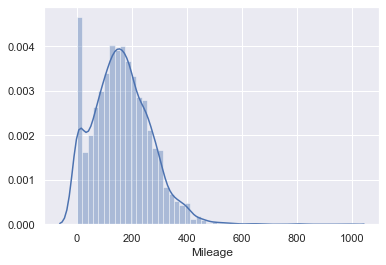

In [17]:
sns.distplot(data_no_mv['Mileage'])

In [18]:
q=data_1['Price'].quantile(.99)
data_2=data_1[data_no_mv['Price']<q]
data_2.describe(include="all")

C:\Users\Home\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


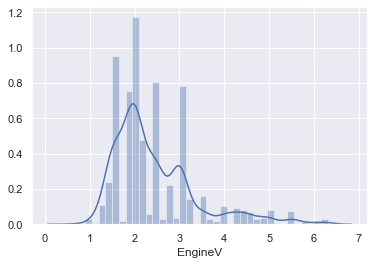

In [19]:
data_3=data_2[data_2['EngineV']< 6.5]
sns.distplot(data_3['EngineV'])

In [20]:
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3920,3920.000000,3920,3920.000000,3920.000000,3920,3920,3920.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1503,NaN,NaN,1811,3555,NaN
mean,NaN,16888.830092,NaN,166.566071,2.434168,NaN,NaN,2006.212245
std,NaN,16358.387518,NaN,102.125134,0.942994,NaN,NaN,6.640889
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6950.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20869.362500,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [21]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]


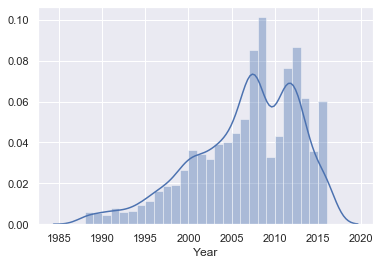

In [22]:
sns.distplot(data_4['Year'])

In [23]:
data_cleaned=data_4.reset_index(drop=True)

In [24]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3864,3864.000000,3864,3864.000000,3864.000000,3864,3864,3864.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1469,NaN,NaN,1800,3499,NaN
mean,NaN,17086.289884,NaN,165.752847,2.441211,NaN,NaN,2006.526398
std,NaN,16384.385551,NaN,101.648306,0.946389,NaN,NaN,6.137422
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20999.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Text(0.5, 1.0, 'Mileage and price')

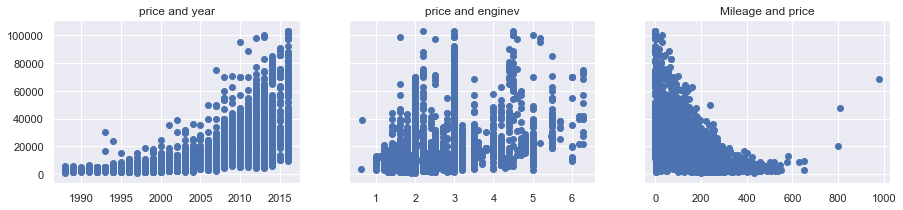

In [28]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True, figsize=(15,3))
#subplots is to create a figure and set of subplots
#sharey is set to true it means it is shared among all subjects
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('price and enginev')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and price')

In [29]:
log_price=np.log(data_cleaned['Price'])

In [30]:
data_cleaned['log-price']=log_price

In [31]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log-price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3859,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3860,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3861,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3862,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Mileage and price')

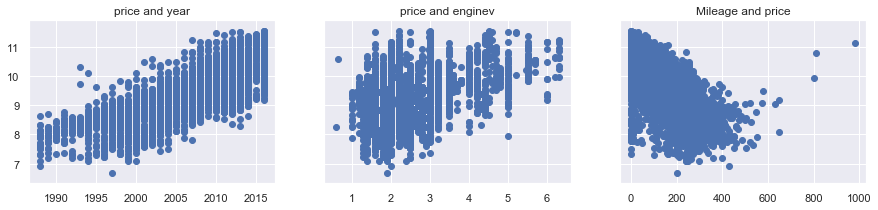

In [32]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True, figsize=(15,3))
#subplots is to create a figure and set of subplots
#sharey is set to true it means it is shared among all subjects
ax1.scatter(data_cleaned['Year'],data_cleaned['log-price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log-price'])
ax2.set_title('price and enginev')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log-price'])
ax3.set_title('Mileage and price')

In [33]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [34]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log-price'], dtype=object)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=data_cleaned[['Mileage','Year','EngineV']]
#values of the features stored in variable which we want to check
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif["features"]=variable.columns


In [38]:
vif

,VIF,features
0,3.636711,Mileage
1,10.089535,Year
2,7.655968,EngineV


In [39]:
#year seems to have a lot of collinearity so we would drop it
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [41]:
#now we would get dummy variables with pandas method get dummy
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first="True")
#drop_first is to whether to get k-1 dummies or not
data_with_dummies.head()

,Mileage,EngineV,log-price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [43]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log-price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [44]:
cols=['log-price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [46]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log-price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [55]:
targets=data_preprocessed['log-price']
inputs=data_preprocessed.drop(['log-price'],axis=1)

In [56]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
x_scaled=scaler.transform(inputs)

In [60]:
#splitting data into training and testing.Training and testing is done so that models can take the data and predict
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,targets,test_size=0.02)

In [65]:
#creating regressions
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

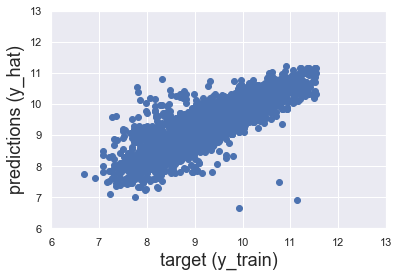

In [66]:
y_hat=reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('target (y_train)',size=18)
plt.ylabel('predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#lim is to set limits

Text(0.5, 1.0, 'Residual pdf')

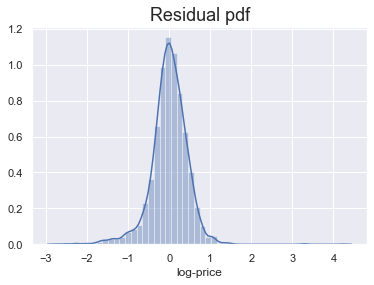

In [68]:
#the difference between the error and the predictions

sns.distplot(y_train-y_hat)
plt.title("Residual pdf",size=18)

In [69]:
reg.score(x_train,y_train)

0.7247685494494405

In [70]:
reg.intercept_

9.383640214463728

In [72]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weight']=reg.coef_
reg_summary

,Features,Weight
0,Mileage,-0.422229
1,EngineV,0.206896
2,Brand_BMW,0.013458
3,Brand_Mercedes-Benz,-0.002527
4,Brand_Mitsubishi,-0.136072
5,Brand_Renault,-0.179538
6,Brand_Toyota,-0.050099
7,Brand_Volkswagen,-0.086468
8,Body_hatch,-0.147772
9,Body_other,-0.100396


In [73]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [74]:
#we can see that audi has been dropped and it is the bench mark

In [76]:
yhat_test=(reg.predict(x_test))

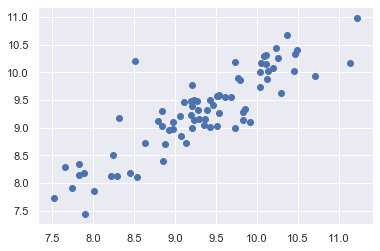

In [77]:
plt.scatter(y_test,yhat_test)

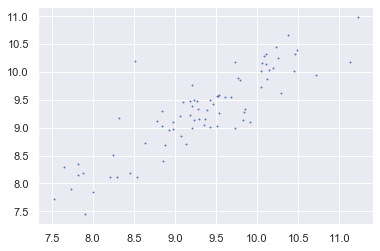

In [80]:
plt.scatter(y_test,yhat_test,.8)

In [84]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
#exp method to convert log data into exponential

In [85]:
df_pf

,Predictions
0,22261.994360
1,19171.659605
2,5989.313485
3,9134.047563
4,16787.570616
...,...
73,11159.417137
74,3563.726480
75,10494.119893
76,26970.070391


In [83]:
df_pf.head()

,Predictions
0,10.010636
1,9.861188
2,8.697732
3,9.119764
4,9.728394


In [86]:
df_pf['Targets']=np.exp(y_test)

In [87]:
df_pf

,Predictions,Targets
0,22261.994360,NaN
1,19171.659605,NaN
2,5989.313485,NaN
3,9134.047563,NaN
4,16787.570616,NaN
...,...,...
73,11159.417137,NaN
74,3563.726480,NaN
75,10494.119893,NaN
76,26970.070391,NaN


In [88]:
y_test=y_test.reset_index(drop=True)

In [89]:
y_test.head()

0    10.043249
1     9.798127
2     8.881836
3     8.787220
4    10.043249
Name: log-price, dtype: float64

In [90]:
df_pf['Targets']=np.exp(y_test)
df_pf

,Predictions,Targets
0,22261.994360,23000.0
1,19171.659605,18000.0
2,5989.313485,7200.0
3,9134.047563,6550.0
4,16787.570616,23000.0
...,...,...
73,11159.417137,12000.0
74,3563.726480,2650.0
75,10494.119893,13900.0
76,26970.070391,4999.0


In [92]:
df_pf['residuals']=df_pf['Targets']-df_pf['Predictions']

In [93]:
df_pf

,Predictions,Targets,residuals
0,22261.994360,23000.0,738.005640
1,19171.659605,18000.0,-1171.659605
2,5989.313485,7200.0,1210.686515
3,9134.047563,6550.0,-2584.047563
4,16787.570616,23000.0,6212.429384
...,...,...,...
73,11159.417137,12000.0,840.582863
74,3563.726480,2650.0,-913.726480
75,10494.119893,13900.0,3405.880107
76,26970.070391,4999.0,-21971.070391


In [94]:
df_pf.describe()

,Predictions,Targets,residuals
count,78.000000,78.000000,78.000000
mean,14075.131424,15395.455000,1320.323576
std,10330.039612,13182.332395,7619.126813
min,1713.293587,1850.000000,-21971.070391
25%,7934.869521,7050.000000,-1404.181535
50%,11054.174455,11600.000000,214.477459
75%,19347.330977,19975.000000,2882.307639
max,59179.534466,75000.000000,42320.088606
